In [1]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn import metrics
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
from sklearn import tree

# Load dataset

url = "F:\Ritvik Work\Study\Projects\ML\\adult.csv"
df = pd.read_csv(url)


c:\python27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
col_names = df.columns
for c in col_names:
	df[c] = df[c].replace("?", np.NaN)

df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [3]:
df.head(20)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Private,227026,HS-grad,9,Never-married,Prof-specialty,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [4]:
df.replace(['Divorced', 'Married-AF-spouse', 
              'Married-civ-spouse', 'Married-spouse-absent', 
              'Never-married','Separated','Widowed'],
             ['divorced','married','married','married',
              'not married','not married','not married'], inplace = True)
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,not married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,married,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,married,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,married,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,not married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,not married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Private,227026,HS-grad,9,not married,Prof-specialty,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,married,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,not married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,married,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelEncoder = preprocessing.LabelEncoder()
category_col =['workclass', 'race','marital-status', 'gender', 'income'] 

for col in category_col:
    df[col] = labelEncoder.fit_transform(df[col])


In [6]:
df.head(20)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,11th,7,2,Machine-op-inspct,Own-child,2,1,0,0,40,United-States,0
1,38,3,89814,HS-grad,9,1,Farming-fishing,Husband,4,1,0,0,50,United-States,0
2,28,1,336951,Assoc-acdm,12,1,Protective-serv,Husband,4,1,0,0,40,United-States,1
3,44,3,160323,Some-college,10,1,Machine-op-inspct,Husband,2,1,7688,0,40,United-States,1
4,18,3,103497,Some-college,10,2,Prof-specialty,Own-child,4,0,0,0,30,United-States,0
5,34,3,198693,10th,6,2,Other-service,Not-in-family,4,1,0,0,30,United-States,0
6,29,3,227026,HS-grad,9,2,Prof-specialty,Unmarried,2,1,0,0,40,United-States,0
7,63,5,104626,Prof-school,15,1,Prof-specialty,Husband,4,1,3103,0,32,United-States,1
8,24,3,369667,Some-college,10,2,Other-service,Unmarried,4,0,0,0,40,United-States,0
9,55,3,104996,7th-8th,4,1,Craft-repair,Husband,4,1,0,0,10,United-States,0


In [7]:
category_col_1 =['workclass', 'education', 'occupation',
               'relationship','native-country'] 

df_2 = pd.get_dummies(df, columns=category_col_1, drop_first=True)

In [8]:
df_2.head(20)

,age,fnlwgt,educational-num,marital-status,race,gender,capital-gain,capital-loss,hours-per-week,income,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,2,2,1,0,0,40,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,1,4,1,0,0,50,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,1,4,1,0,0,40,1,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,1,2,1,7688,0,40,1,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,2,4,0,0,0,30,0,...,0,0,0,0,0,0,0,1,0,0
5,34,198693,6,2,4,1,0,0,30,0,...,0,0,0,0,0,0,0,1,0,0
6,29,227026,9,2,2,1,0,0,40,0,...,0,0,0,0,0,0,0,1,0,0
7,63,104626,15,1,4,1,3103,0,32,1,...,0,0,0,0,0,0,0,1,0,0
8,24,369667,10,2,4,0,0,0,40,0,...,0,0,0,0,0,0,0,1,0,0
9,55,104996,4,1,4,1,0,0,10,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
dataframe=df_2.drop('fnlwgt',1)
dataframe =dataframe[[c for c in dataframe if c not in ['income']] + ['income']]
dataframe.head(20)

,age,educational-num,marital-status,race,gender,capital-gain,capital-loss,hours-per-week,workclass_1,workclass_2,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income
0,25,7,2,2,1,0,0,40,0,0,...,0,0,0,0,0,0,1,0,0,0
1,38,9,1,4,1,0,0,50,0,0,...,0,0,0,0,0,0,1,0,0,0
2,28,12,1,4,1,0,0,40,1,0,...,0,0,0,0,0,0,1,0,0,1
3,44,10,1,2,1,7688,0,40,0,0,...,0,0,0,0,0,0,1,0,0,1
4,18,10,2,4,0,0,0,30,0,0,...,0,0,0,0,0,0,1,0,0,0
5,34,6,2,4,1,0,0,30,0,0,...,0,0,0,0,0,0,1,0,0,0
6,29,9,2,2,1,0,0,40,0,0,...,0,0,0,0,0,0,1,0,0,0
7,63,15,1,4,1,3103,0,32,0,0,...,0,0,0,0,0,0,1,0,0,1
8,24,10,2,4,0,0,0,40,0,0,...,0,0,0,0,0,0,1,0,0,0
9,55,4,1,4,1,0,0,10,0,0,...,0,0,0,0,0,0,1,0,0,0


In [10]:
## making a copy of the data frame
dataframe.to_csv('adult_kearsNN.csv',index=False)

In [11]:
X = dataframe.iloc[:, 0:88].values
y = dataframe.iloc[:, 88].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

import keras
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 88))
# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
                   
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix
print classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

c:\python27\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
Using Theano backend.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
c:\python27\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="relu", input_dim=88, units=6)`
c:\python27\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=6, activation="relu", kernel_initializer="uniform")`
c:\python27\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, activation="sigmoid", kernel_initializer="uniform")`
c:\python27\lib\site-packages\keras\models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warn

Epoch 1/100
39073/39073 [==============================] - 8s 208us/step - loss: 0.3760 - acc: 0.8162
Epoch 2/100
39073/39073 [==============================] - 8s 196us/step - loss: 0.3456 - acc: 0.8398
Epoch 3/100
39073/39073 [==============================] - 8s 203us/step - loss: 0.3401 - acc: 0.8410
Epoch 4/100
39073/39073 [==============================] - 8s 196us/step - loss: 0.3369 - acc: 0.8440
Epoch 5/100
39073/39073 [==============================] - 7s 186us/step - loss: 0.3339 - acc: 0.8451
Epoch 6/100
39073/39073 [==============================] - 8s 202us/step - loss: 0.3318 - acc: 0.8464
Epoch 7/100
39073/39073 [==============================] - 9s 225us/step - loss: 0.3317 - acc: 0.8466
Epoch 8/100
39073/39073 [==============================] - 7s 188us/step - loss: 0.3308 - acc: 0.8473
Epoch 9/100
39073/39073 [==============================] - 7s 189us/step - loss: 0.3303 - acc: 0.8462
Epoch 10/100
39073/39073 [==============================] - 7s 184us/step - loss: 

39073/39073 [==============================] - 2s 48us/step - loss: 0.3184 - acc: 0.8544
Epoch 80/100
39073/39073 [==============================] - 2s 48us/step - loss: 0.3183 - acc: 0.8542
Epoch 81/100
39073/39073 [==============================] - 2s 48us/step - loss: 0.3184 - acc: 0.8547
Epoch 82/100
39073/39073 [==============================] - 2s 48us/step - loss: 0.3181 - acc: 0.8540
Epoch 83/100
39073/39073 [==============================] - 2s 48us/step - loss: 0.3183 - acc: 0.8549
Epoch 84/100
39073/39073 [==============================] - 2s 63us/step - loss: 0.3182 - acc: 0.8546
Epoch 85/100
39073/39073 [==============================] - 7s 177us/step - loss: 0.3180 - acc: 0.8548
Epoch 86/100
39073/39073 [==============================] - 6s 165us/step - loss: 0.3181 - acc: 0.8542
Epoch 87/100
39073/39073 [==============================] - 9s 224us/step - loss: 0.3179 - acc: 0.8543
Epoch 88/100
39073/39073 [==============================] - 8s 207us/step - loss: 0.3177 - a

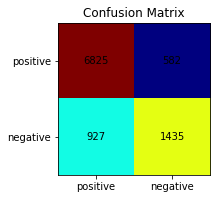

In [17]:
import numpy 

norm_conf = []
for i in cm:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)

fig = plt.figure()
plt.clf()
ax = fig.add_subplot(1,2,1)
ax.set_aspect(1)
res = ax.imshow(numpy.array(norm_conf), cmap=plt.cm.jet, 
                interpolation='nearest')

width, height = cm.shape

for x in xrange(width):
    for y in xrange(height):
        ax.annotate(str(cm[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

plt.title("Confusion Matrix")
plt.xticks(range(width), ['positive','negative'])
plt.yticks(range(height), ['positive','negative'])
plt.show()

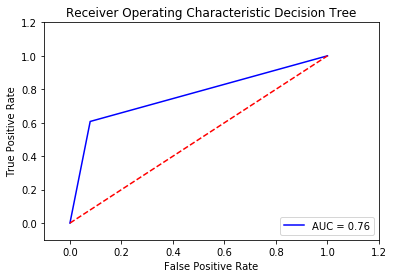

 Gini_coefficient = 0.528961664864


In [19]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)


plt.title('Receiver Operating Characteristic Decision Tree')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Gini_coefficient=2*roc_auc - 1
print "Gini_coefficient =",Gini_coefficient